In [1]:
import os

# The classification goal is to predict whether the client will subscribe (1/0) to a term deposit (variable y).

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import warnings

In [24]:
warnings.filterwarnings("ignore")

In [18]:
os.chdir("C:/Users/abhis/Downloads/bank")

In [22]:
banking=pd.read_csv("bank-full.csv",sep=";")

In [23]:
banking.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [26]:
banking.shape

(45211, 17)

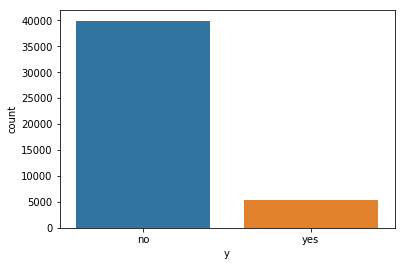

In [27]:
sns.countplot(banking.y)

In [28]:
banking.education.unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [29]:
banking.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

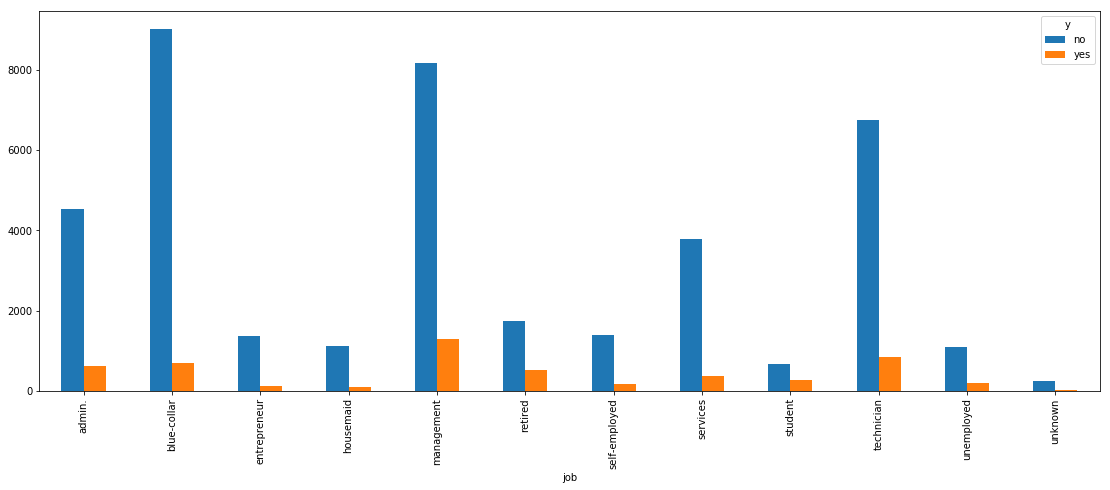

In [35]:

pd.crosstab(banking.job,banking.y).plot(kind='bar',figsize=[19,7])

In [36]:
banking.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


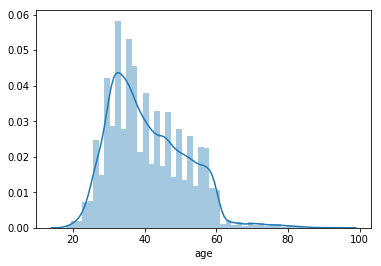

In [37]:
sns.distplot(banking.age)

In [44]:
banking[banking.y=='no']["age"].describe()

count    39922.000000
mean        40.838986
std         10.172662
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [45]:
banking[banking.y=='yes']["age"].describe()

count    5289.000000
mean       41.670070
std        13.497781
min        18.000000
25%        31.000000
50%        38.000000
75%        50.000000
max        95.000000
Name: age, dtype: float64

In [39]:
banking.groupby("y")["age"].count()

y
no     39922
yes     5289
Name: age, dtype: int64

In [47]:
banking.poutcome.unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [55]:
banking.groupby(["marital","y"]).count()

age    job  education  default  balance  housing   loan  \
marital  y                                                                
divorced no    4585   4585       4585     4585     4585     4585   4585   
         yes    622    622        622      622      622      622    622   
married  no   24459  24459      24459    24459    24459    24459  24459   
         yes   2755   2755       2755     2755     2755     2755   2755   
single   no   10878  10878      10878    10878    10878    10878  10878   
         yes   1912   1912       1912     1912     1912     1912   1912   

              contact    day  month  duration  campaign  pdays  previous  \
marital  y                                                                 
divorced no      4585   4585   4585      4585      4585   4585      4585   
         yes      622    622    622       622       622    622       622   
married  no     24459  24459  24459     24459     24459  24459     24459   
         yes     2755   2755   2755      2755      2755   2755      2755   
single   no     10878  10878  10878     10878     10878  10878     10878   
         yes     1912   1912   1912      1912      1912   1912      1912   

              poutcome  
marital  y              
divorced no       4585  
         yes       622  
married  no      24459  
         yes      2755  
single   no      10878  
         yes      1912

In [54]:
pd.crosstab(banking.marital,banking.y)

y,no,yes
marital,,
divorced,4585,622
married,24459,2755
single,10878,1912


In [59]:
pd.pivot_table(banking,columns='marital',index='y',aggfunc=np.sum).T

y                        no      yes
         marital                    
age      divorced    207760    30632
         married    1053169   128139
         single      369445    61622
balance  divorced   5076034  1062354
         married   33527082  5278057
         single    13443793  3202362
campaign divorced     12383     1316
         married      71313     6053
         single       29936     3955
day      divorced     72593     9659
         married     390319    41145
         single      171540    29368
duration divorced   1001208   365719
         married    5408687  1487688
         single     2420165   988344
pdays    divorced    176035    37461
         married     834783   198001
         single      443196   127908
previous divorced      2308      563
         married      11636     3510
         single        6103     2117

In [60]:
banking.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


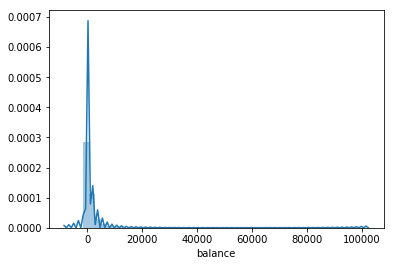

In [61]:
sns.distplot(banking.balance)

In [62]:
banking.balance.unique()

array([ 2143,    29,     2, ...,  8205, 14204, 16353], dtype=int64)

In [68]:

a=pd.DataFrame(banking.groupby(["y","marital"])["balance"].mean()).reset_index()

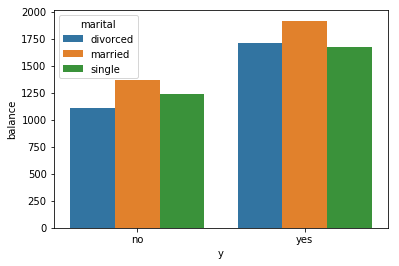

In [69]:
sns.barplot(a.y,a.balance,hue=a.marital)

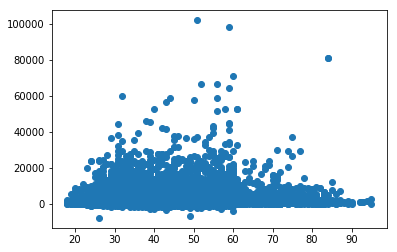

In [70]:
plt.scatter(banking.age,banking.balance)

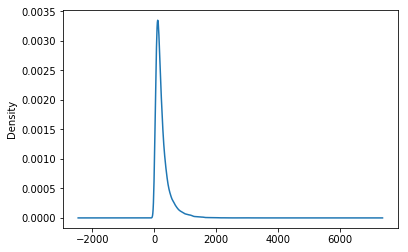

In [75]:
banking.duration.plot(kind="kde")

In [76]:
banking.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [77]:
pd.crosstab(banking.loan,banking.y)

y,no,yes
loan,,
no,33162,4805
yes,6760,484


In [78]:
banking.month.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [83]:
a=pd.crosstab(banking.month,banking.y).reset_index()

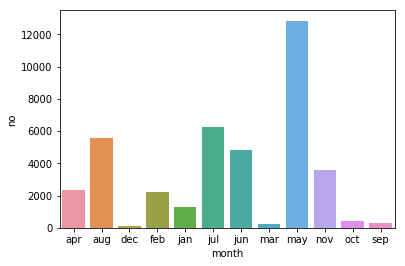

In [84]:
sns.barplot(a.month,a.no)

In [86]:
pd.crosstab(banking.marital,banking.y)

y,no,yes
marital,,
divorced,4585,622
married,24459,2755
single,10878,1912


Text(0, 0.5, 'Proportion of Customers')

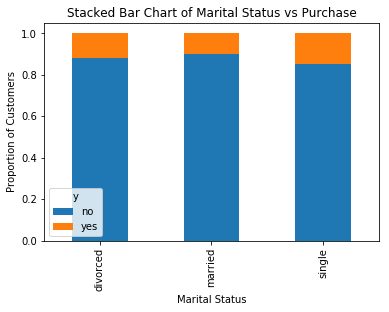

In [89]:
table=pd.crosstab(banking.marital,banking.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')

In [91]:
m=pd.crosstab(banking.loan,banking.y)

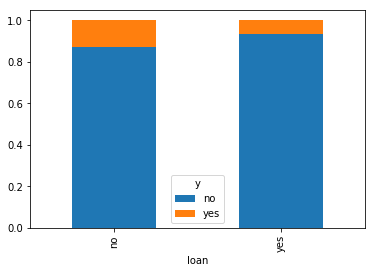

In [96]:
m.div(m.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

Text(0, 0.5, 'Proportion of Customers')

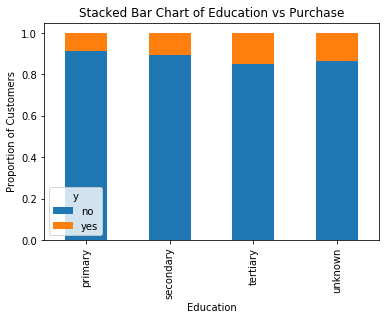

In [97]:
table=pd.crosstab(banking.education,banking.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')

In [98]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [99]:
le=LabelEncoder()

In [100]:
banking.y=le.fit_transform(banking.y)

In [101]:
banking.y.unique()

array([0, 1], dtype=int64)

In [102]:
banking.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [106]:
banking.drop("day",axis=1,inplace=True)

In [107]:
banking.head()

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,may,198,1,-1,0,unknown,0


In [108]:
dummybanking=pd.get_dummies(banking)

In [109]:
dummybanking.head()

,age,balance,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,261,1,-1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,151,1,-1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,76,1,-1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,92,1,-1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,33,1,198,1,-1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [110]:
std=StandardScaler()

In [111]:
a=dummybanking.drop("y",axis=1)

In [112]:
scaled_data=std.fit_transform(a)

In [113]:
scaled_data=pd.DataFrame(scaled_data,columns=a.columns)

In [114]:
scaled_data.head()

,age,balance,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,1.606965,0.256419,0.011016,-0.569351,-0.411453,-0.25194,-0.359369,-0.523740,-0.184415,-0.16793,...,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.348687,-0.205972,-0.185948,0.472519
1,0.288529,-0.437895,-0.416127,-0.569351,-0.411453,-0.25194,-0.359369,-0.523740,-0.184415,-0.16793,...,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.348687,-0.205972,-0.185948,0.472519
2,-0.747384,-0.446762,-0.707361,-0.569351,-0.411453,-0.25194,-0.359369,-0.523740,5.422561,-0.16793,...,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.348687,-0.205972,-0.185948,0.472519
3,0.571051,0.047205,-0.645231,-0.569351,-0.411453,-0.25194,-0.359369,1.909346,-0.184415,-0.16793,...,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.348687,-0.205972,-0.185948,0.472519
4,-0.747384,-0.447091,-0.233620,-0.569351,-0.411453,-0.25194,-0.359369,-0.523740,-0.184415,-0.16793,...,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.348687,-0.205972,-0.185948,0.472519


In [115]:
x=scaled_data
y=dummybanking.y

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
columns = X_train.columns

os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  55906
Number of no subscription in oversampled data 27953
Number of subscription 27953
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [120]:
os_data_y.head()

,y
0,0
1,0
2,0
3,0
4,0


In [121]:
#applying rfe to select the best featurre among all

from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()



In [122]:
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[False False  True  True False False False False False False False False
 False False False False False False False False  True  True False False
 False False False  True  True  True  True  True  True  True False  True
 False False  True  True  True  True False  True  True  True False False
  True False]
[14 12  1  1  4 21  9 16 13 11 20  2 18 17 10 24 29 31 23 15  1  1 25  8
 30 26 27  1  1  1  1  1  1  1  5  1  6  7  1  1  1  1 22  1  1  1 19 28
  1  3]


In [123]:
os_data_X.columns

Index(['age', 'balance', 'duration', 'campaign', 'pdays', 'previous',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

In [132]:
cols= ['job_blue-collar', 'job_housemaid', 'marital_married', 'default_no', 
      'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 
      'month_may', 'month_nov', 'month_oct', "poutcome_failure", "poutcome_success"] 
X=os_data_X[cols]
y=os_data_y['y']

In [134]:
X.shape

(55906, 17)

In [135]:
y.shape

(55906,)

In [133]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.592952
         Iterations 7
                          Results: Logit
Model:               Logit            Pseudo R-squared: 0.145     
Dependent Variable:  y                AIC:              66333.1446
Date:                2019-06-05 20:10 BIC:              66484.9789
No. Observations:    55906            Log-Likelihood:   -33150.   
Df Model:            16               LL-Null:          -38751.   
Df Residuals:        55889            LLR p-value:      0.0000    
Converged:           1.0000           Scale:            1.0000    
No. Iterations:      7.0000                                       
------------------------------------------------------------------
                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
job_blue-collar   -0.0752   0.0102  -7.3790 0.0000 -0.0952 -0.0552
job_housemaid     -0.0688   0.0104  -6.6145 0.0000 -0

# as we can see the p value is less than 0.05 in each of the columns so we will go with all the variables.

In [136]:
logreg=LogisticRegression()
predictions=logreg.fit(X,y).predict(X_test[cols])

In [140]:
from sklearn.metrics import accuracy_score,cohen_kappa_score,confusion_matrix,classification_report

In [138]:
accuracy_score(y_test,predictions)

0.7269242111471542

In [139]:
confusion_matrix(y_test,predictions)

array([[8926, 3043],
       [ 661,  934]], dtype=int64)

In [142]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.75      0.83     11969
           1       0.23      0.59      0.34      1595

   micro avg       0.73      0.73      0.73     13564
   macro avg       0.58      0.67      0.58     13564
weighted avg       0.85      0.73      0.77     13564



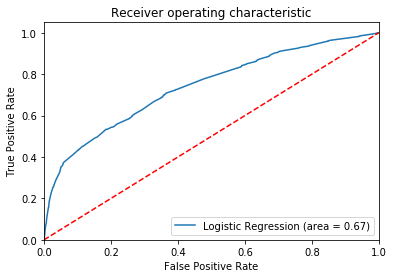

In [144]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test[cols]))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test[cols])[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()